Import libraries

Taken from website:-
https://ourworldindata.org/coronavirus-source-data

In [1]:
import pandas as pd
import numpy as np

Read files

In [2]:
# load datasets
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.025,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115867,ZWE,Africa,Zimbabwe,2021-09-06,125671.0,121.0,155.714,4493.0,11.0,11.000,8326.900,8.017,10.318,297.704,0.729,0.729,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41445.0,NaN,NaN,NaN,NaN,2746.0,78.70,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
115868,ZWE,Africa,Zimbabwe,2021-09-07,125796.0,125.0,146.143,4503.0,10.0,12.000,8335.183,8.282,9.683,298.367,0.663,0.795,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4493943.0,2750381.0,1743562.0,NaN,NaN,39160.0,29.78,18.22,11.55,NaN,2595.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
115869,ZWE,Africa,Zimbabwe,2021-09-08,125931.0,135.0,138.714,4517.0,14.0,11.286,8344.128,8.945,9.191,299.294,0.928,0.748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4553076.0,2781803.0,1771273.0,NaN,59133.0,40378.0,30.17,18.43,11.74,NaN,2675.0,NaN,15092171.0,42

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115872 entries, 0 to 115871
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               115872 non-null  object 
 1   continent                              110564 non-null  object 
 2   location                               115872 non-null  object 
 3   date                                   115872 non-null  object 
 4   total_cases                            110267 non-null  float64
 5   new_cases                              110264 non-null  float64
 6   new_cases_smoothed                     109249 non-null  float64
 7   total_deaths                           99642 non-null   float64
 8   new_deaths                             99797 non-null   float64
 9   new_deaths_smoothed                    109249 non-null  float64
 10  total_cases_per_million                109685 non-null  

Convert date to number

In [4]:
import datetime 

date = df.date

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date_num'] = df['date'].dt.strftime('%d%m%Y')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.025,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,24022020
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,25022020
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,26022020
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,27022020
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,28022020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115867,ZWE,Africa,Zimbabwe,2021-09-06,125671.0,121.0,155.714,4493.0,11.0,11.000,8326.900,8.017,10.318,297.704,0.729,0.729,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41445.0,NaN,NaN,NaN,NaN,2746.0,78.70,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,06092021
115868,ZWE,Africa,Zimbabwe,2021-09-07,125796.0,125.0,146.143,4503.0,10.0,12.000,8335.183,8.282,9.683,298.367,0.663,0.795,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4493943.0,2750381.0,1743562.0,NaN,NaN,39160.0,29.78,18.22,11.55,NaN,2595.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,07092021
115869,ZWE,Africa,Zimbabwe,2021-09-08,125931.0,135.0,138.714,4517.0,14.0,11.286,8344.128,8.945,9.191,299.294,0.928,0.748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4553076.0,2781803.0,

Percent new deaths to new cases

In [5]:
df['per_death_to_case'] = df.new_cases / df.new_deaths
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.025,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,24022020,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,25022020,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,26022020,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,27022020,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.025,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,28022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115867,ZWE,Africa,Zimbabwe,2021-09-06,125671.0,121.0,155.714,4493.0,11.0,11.000,8326.900,8.017,10.318,297.704,0.729,0.729,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41445.0,NaN,NaN,NaN,NaN,2746.0,78.70,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,06092021,11.000000
115868,ZWE,Africa,Zimbabwe,2021-09-07,125796.0,125.0,146.143,4503.0,10.0,12.000,8335.183,8.282,9.683,298.367,0.663,0.795,0.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4493943.0,2750381.0,1743562.0,NaN,NaN,39160.0,29.78,18.22,11.55,NaN,2595.0,NaN,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,07092021,12.500000
115869,ZWE,Africa,Zimbabwe,2021-09-08,125931.0,135.0,138.714,4517.0,14.0,11.286,8344.128,8.945,9.191,299.294,0.928,0.748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Country

In [6]:
country = df['location'].to_list()

# using naive method to remove duplicated from list  
list_country = [] 
for i in country: 
    if i not in list_country: 
        list_country.append(i) 

list_country

['Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bonaire Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Democratic Republic of Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Europe',
 'European Union',


In [7]:
print(len(list_country))

233


Graphical Representation

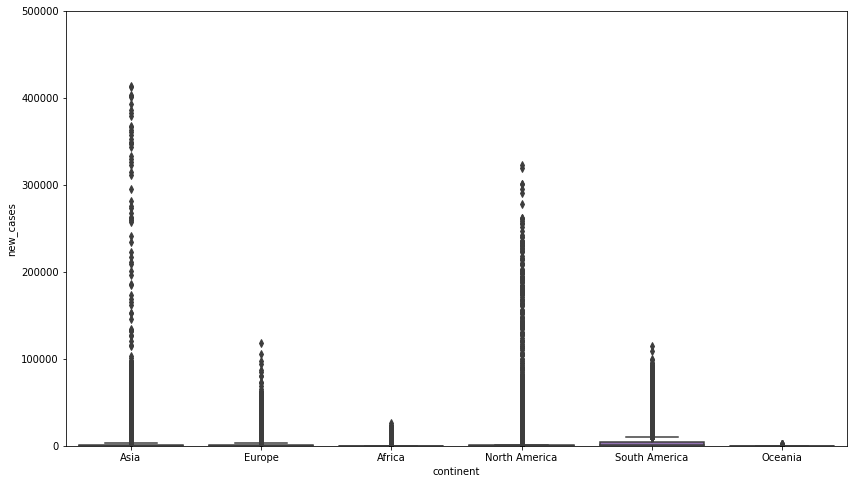

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'continent'
data = pd.concat([df['new_cases'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_cases", data=data)
fig.axis(ymin=0, ymax=500000);

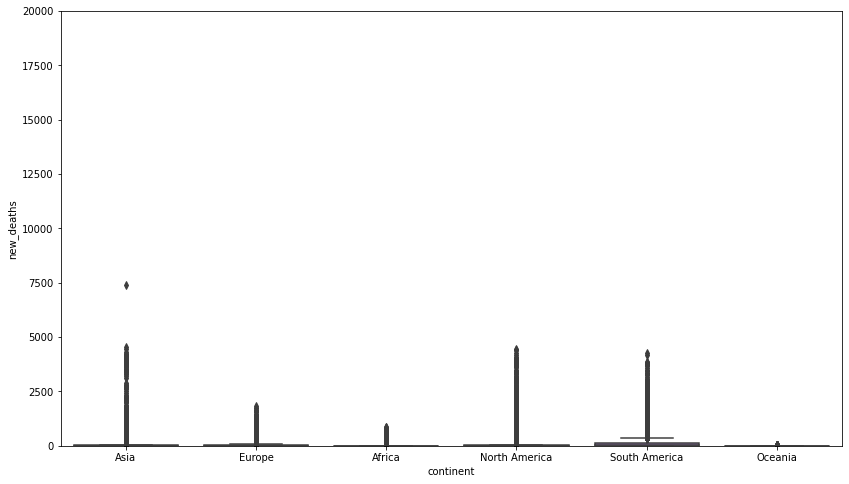

In [9]:
var = 'continent'
data = pd.concat([df['new_deaths'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="new_deaths", data=data)
fig.axis(ymin=0, ymax=20000);

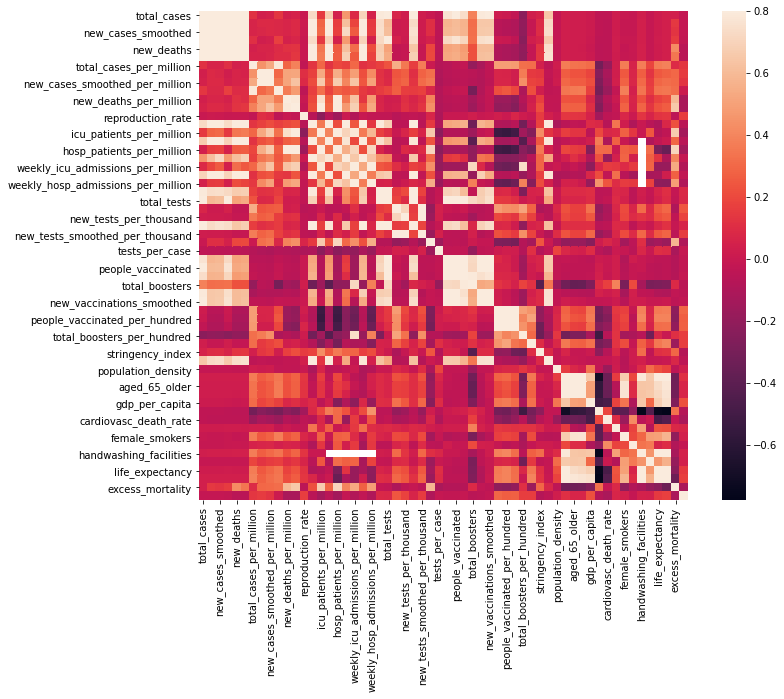

In [10]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

Countries

In [11]:
country = "United Kingdom"

include_uk = df[df['location'].values == country]
exclude_uk = df[df['location'].values != country]
uk_cov19 = include_uk
uk_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
109230,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,0.029,0.029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,31012020,NaN
109231,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,01022020,NaN
109232,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,0.029,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,-5.15,02022020,NaN
109233,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,0.117,0.088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,03022020,NaN
109234,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,0.117,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,04022020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109814,GBR,Europe,United Kingdom,2021-09-06,7051516.0,40976.0,37475.286,133598.0,45.0,112.857,103383.879,600.758,549.434,1958.711,0.660,1.655,1.16,1062.0,15.570,8003.0,117.334,NaN,NaN,NaN,NaN,1335485.0,250408936.0,3671.302,19.580,1058660.0,15.521,0.035,28.2,tests performed,91827909.0,48292811.0,43535098.0,NaN,102713.0,141331.0,134.63,70.80,63.83,NaN,2072.0,43.98,68207114.0,272.898,40.8,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932,NaN,06092021,910.577778
109815,GBR,Europe,United Kingdom,2021-09-07,7089051.0,37535.0,38242.143,133808.0,210.0,135.571,103934.188,550.309,560.677,1961.789,3.079,1.988,1.16,1047.0,15.350,7934.0,116.322,NaN,NaN,NaN,NaN,1143885.0,251552821.0,3688.073,16.771,1091853.0,16.008,0.035,28.6,tests performed,91940381.0,48319435.0,43620946.0,NaN,112472.0,134641.0,134.80,70.84,63.95,N

In [12]:
country = "United States"

include_us = df[df['location'].values == country]
exclude_us = df[df['location'].values != country]
us_cov19 = include_us
us_cov19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality,date_num,per_death_to_case
109819,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,22012020,NaN
109820,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,23012020,NaN
109821,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,24012020,NaN
109822,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,25012020,NaN
109823,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,0.75,26012020,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110412,USA,North America,United States,2021-09-06,40018318.0,73326.0,137270.286,648998.0,530.0,1448.714,120205.786,220.254,412.328,1949.440,1.592,4.352,0.99,25835.0,77.602,95823.0,287.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,848045.0,NaN,NaN,NaN,NaN,2522.0,57.87,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN,06092021,138.350943
110413,USA,North America,United States,2021-09-07,40280001.0,261683.0,154552.857,650511.0,1513.0,1474.571,120991.821,786.035,464.241,1953.985,4.545,4.429,1.05,26006.0,78.116,96540.0,289.984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,375995378.0,207589611.0,176659496.0,NaN,NaN,826193.0,111.80,61.72,52.53,NaN,2457.0,NaN,332915074.0,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79

UK

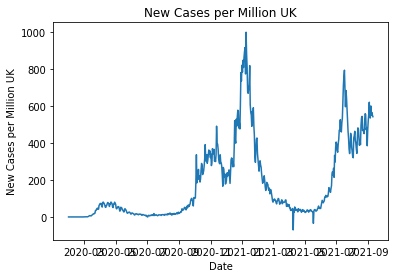

In [13]:
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million UK')
plt.title('New Cases per Million UK')
plt.show()

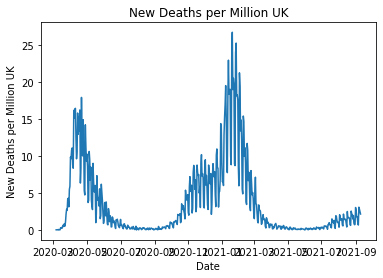

In [14]:
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million UK')
plt.title('New Deaths per Million UK')
plt.show()

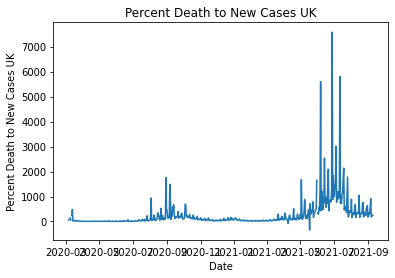

In [15]:
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases UK')
plt.title('Percent Death to New Cases UK')
plt.show()

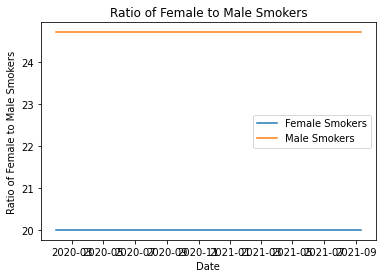

In [16]:
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers')
plt.title('Ratio of Female to Male Smokers')
plt.show()

US

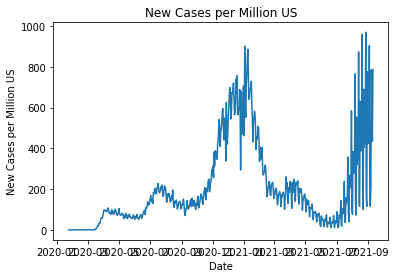

In [17]:
plt.plot(us_cov19.date, us_cov19.new_cases_per_million)
plt.xlabel('Date')
plt.ylabel('New Cases per Million US')
plt.title('New Cases per Million US')
plt.show()

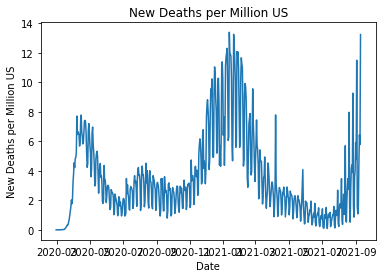

In [18]:
plt.plot(us_cov19.date, us_cov19.new_deaths_per_million)
plt.xlabel('Date')
plt.ylabel('New Deaths per Million US')
plt.title('New Deaths per Million US')
plt.show()

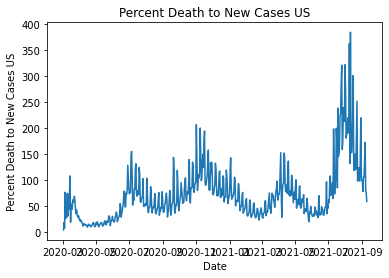

In [19]:
plt.plot(us_cov19.date, us_cov19.per_death_to_case)
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases US')
plt.title('Percent Death to New Cases US')
plt.show()

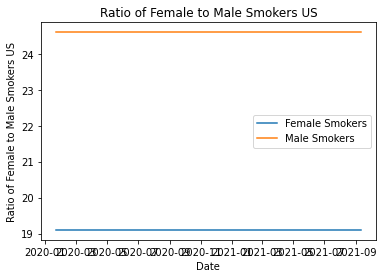

In [20]:
plt.plot(us_cov19.date, us_cov19.female_smokers)
plt.plot(us_cov19.date, us_cov19.male_smokers)
plt.legend(['Female Smokers', 'Male Smokers'])
plt.xlabel('Date')
plt.ylabel('Ratio of Female to Male Smokers US')
plt.title('Ratio of Female to Male Smokers US')
plt.show()

Comparisons

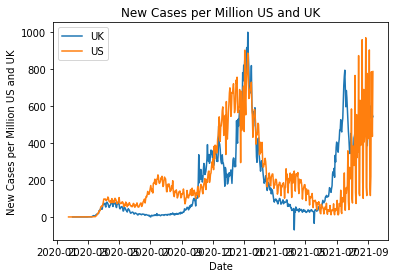

In [21]:
plt.plot(uk_cov19.date, uk_cov19.new_cases_per_million)
plt.plot(us_cov19.date, us_cov19.new_cases_per_million)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('New Cases per Million US and UK')
plt.title('New Cases per Million US and UK')
plt.show()

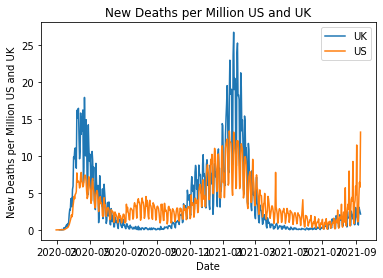

In [22]:
plt.plot(uk_cov19.date, uk_cov19.new_deaths_per_million)
plt.plot(us_cov19.date, us_cov19.new_deaths_per_million)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('New Deaths per Million US and UK')
plt.title('New Deaths per Million US and UK')
plt.show()

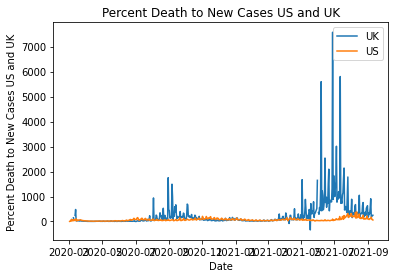

In [23]:
plt.plot(uk_cov19.date, uk_cov19.per_death_to_case)
plt.plot(us_cov19.date, us_cov19.per_death_to_case)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('Percent Death to New Cases US and UK')
plt.title('Percent Death to New Cases US and UK')
plt.show()

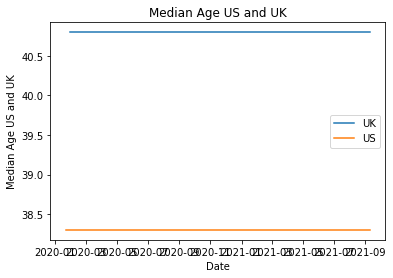

In [24]:
plt.plot(uk_cov19.date, uk_cov19.median_age)
plt.plot(us_cov19.date, us_cov19.median_age)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('Median Age US and UK')
plt.title('Median Age US and UK')
plt.show()

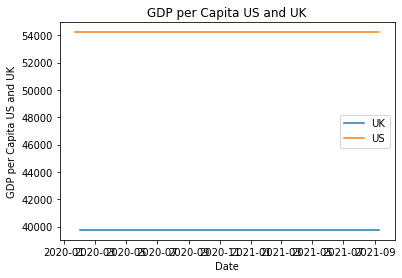

In [25]:
plt.plot(uk_cov19.date, uk_cov19.gdp_per_capita)
plt.plot(us_cov19.date, us_cov19.gdp_per_capita)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('GDP per Capita US and UK')
plt.title('GDP per Capita US and UK')
plt.show()

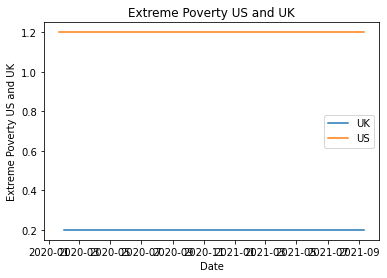

In [26]:
plt.plot(uk_cov19.date, uk_cov19.extreme_poverty)
plt.plot(us_cov19.date, us_cov19.extreme_poverty)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('Extreme Poverty US and UK')
plt.title('Extreme Poverty US and UK')
plt.show()

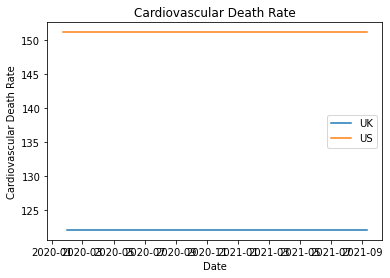

In [27]:
plt.plot(uk_cov19.date, uk_cov19.cardiovasc_death_rate)
plt.plot(us_cov19.date, us_cov19.cardiovasc_death_rate)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('Cardiovascular Death Rate')
plt.title('Cardiovascular Death Rate')
plt.show()

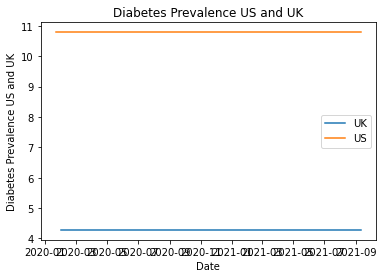

In [28]:
plt.plot(uk_cov19.date, uk_cov19.diabetes_prevalence)
plt.plot(us_cov19.date, us_cov19.diabetes_prevalence)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('Diabetes Prevalence US and UK')
plt.title('Diabetes Prevalence US and UK')
plt.show()

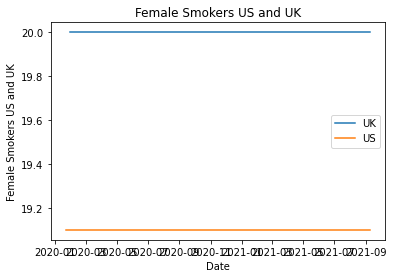

In [29]:
plt.plot(uk_cov19.date, uk_cov19.female_smokers)
plt.plot(us_cov19.date, us_cov19.female_smokers)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('Female Smokers US and UK')
plt.title('Female Smokers US and UK')
plt.show()

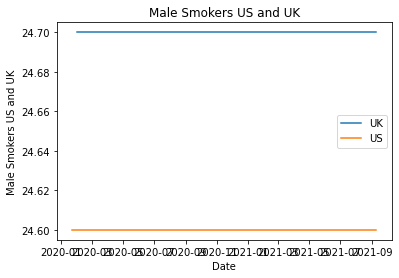

In [30]:
plt.plot(uk_cov19.date, uk_cov19.male_smokers)
plt.plot(us_cov19.date, us_cov19.male_smokers)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('Male Smokers US and UK')
plt.title('Male Smokers US and UK')
plt.show()

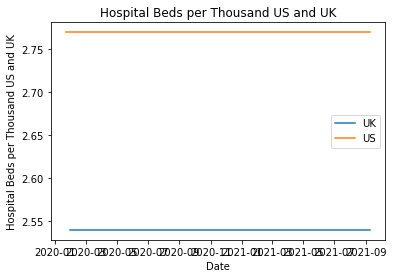

In [31]:
plt.plot(uk_cov19.date, uk_cov19.hospital_beds_per_thousand)
plt.plot(us_cov19.date, us_cov19.hospital_beds_per_thousand)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('Hospital Beds per Thousand US and UK')
plt.title('Hospital Beds per Thousand US and UK')
plt.show()

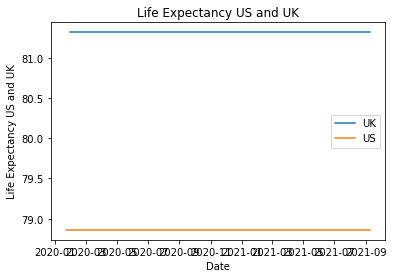

In [32]:
plt.plot(uk_cov19.date, uk_cov19.life_expectancy)
plt.plot(us_cov19.date, us_cov19.life_expectancy)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('Life Expectancy US and UK')
plt.title('Life Expectancy US and UK')
plt.show()

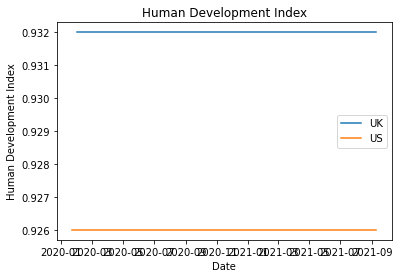

In [33]:
plt.plot(uk_cov19.date, uk_cov19.human_development_index)
plt.plot(us_cov19.date, us_cov19.human_development_index)
plt.legend(['UK', 'US'])
plt.xlabel('Date')
plt.ylabel('Human Development Index')
plt.title('Human Development Index')
plt.show()